TASK 1: Prediction using SUPERVISED ML

Predict the percentage of an student based on
the no. of study hours.


Importing Necessary Libraries

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [73]:
url = r"http://bit.ly/w-data"
data = pd.read_csv(url)
data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Visualisation of the input data

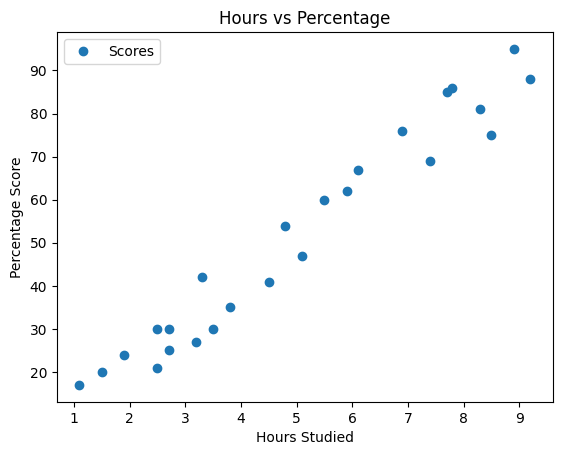

In [74]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [75]:
data.head()  # To view the first few rows of the dataset
data.describe() # Summary statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [76]:
X = data['Hours'].values.reshape(-1, 1)  # Independent variable (study hours)
y = data['Scores']  # Dependent variable (percentage)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the Model

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Training Complete")

Training Complete


Visualizing the Regression line on the Data

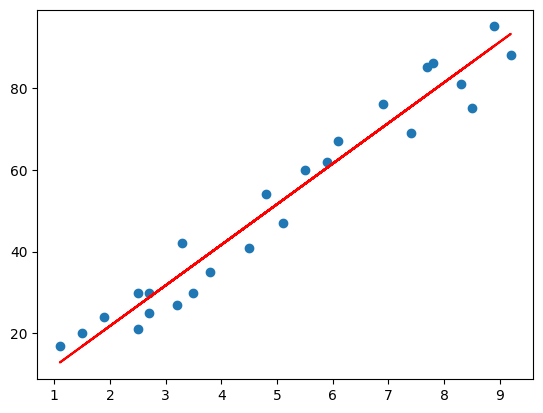

In [79]:
line = model.coef_*X+model.intercept_
# Plotting for the test data
plt.scatter(X, y,label='data')
plt.plot(X, line,label='Line for best fit',color='red')
plt.show()

In [80]:
y_pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:}")

Mean Absolute Error: 4.183859899002975


In [81]:
df = pd.DataFrame({'Hours': X_test.flatten(), 'Actual': y_test, 'Predicted': y_pred})  
df 

,Hours,Actual,Predicted
5,1.5,20,16.884145
2,3.2,27,33.732261
19,7.4,69,75.357018
16,2.5,30,26.794801
11,5.9,62,60.491033


Comparison of Actual result and Predicted Model result

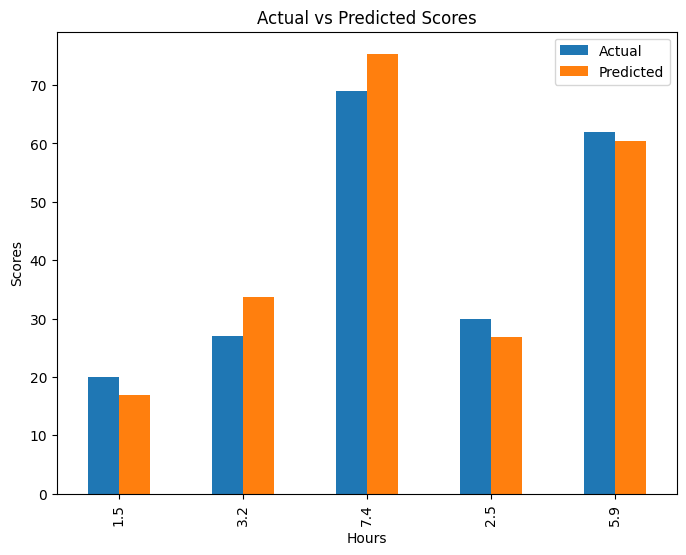

In [82]:
df.plot(x='Hours', y=['Actual', 'Predicted'], kind='bar', figsize=(8,6))
plt.title('Actual vs Predicted Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [83]:
hours = 9.25  # Number of study hours
predicted_score = model.predict([[hours]])
print(f"Predicted score if a student studies for {hours} hrs/day: {predicted_score[0]:}")

Predicted score if a student studies for 9.25 hrs/day: 93.69173248737535


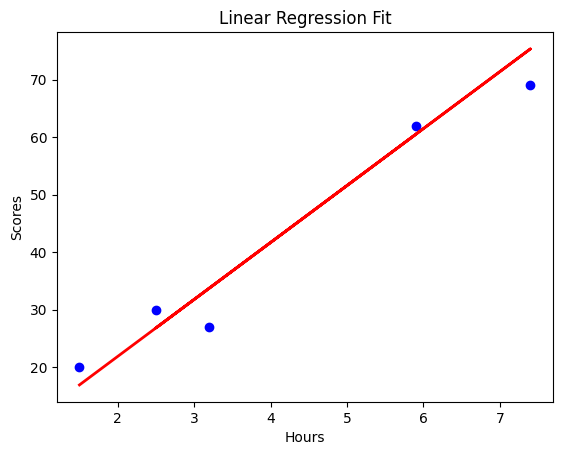

In [84]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression Fit')
plt.show()

Model Evaluation

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355


Final Conclusion

From the above result we can say that if a studied for 9.25 hours/day then student got 93.69% Marks.